# Ads Click Through Rate(CTR) Optimization Project

*** A car company wants to put a advertisement for marketing purpose. The department of marketing prepared different versions of the ad. All the versions of the ad look great. So they are not sure which ad to put on the social media for promotion. They want to put the ad that will get maximum click through rate(CTR). ***

*** In reality we will put a different version of the ad on social media each time a user logs in, and check whether the ad is viewed by  the user. Once we collect the enough samples, then we will develop a reinforment learning model to determine which ad will get the maximum CTR. ***

*** In here, we have a simulation data which represents the user behavior. Meaning, we have 10 different versions of the ad and are presented each of them to 10000 users. Each row in the dataset represents single user. 1 in a cell represent that the user clicks the ad when it appears in user's social media profile(reward = 1) and 0 represent he/she did not click the ad(reward = 0). *** 

*** In reinforcement learning, the selection of ad is not random rather it depends on what we observed on previous rounds. That is how we are going to obtain the maximum click thru rate. It all depends on the observation from the begining of time upto current time. *** 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt, log
from operator import itemgetter

# Importing the dataset
data = pd.read_csv('Ads.csv')

N = data.shape[0] # number of observations
d = data.shape[1] # number of dimensions(number of ads in this case)

*** We are going to implement 3 different algorith here ***
1. Random Selection
2. Upper Confidence Bound
3. Thompson Sampling 


## Random Selection

*** Here the ad is selected randomly for each user. Then we check if that user would have clicked that ad by rrefering to our simulation data. ***

In [2]:
import random
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d) # ad is randomly selected
    ads_selected.append(ad) 
    reward = data.values[n, ad] 
    # reward = 1 if user would have clicked the randomly selected ad. Otherwise reward = 0(just a referebce to our dataset)
    total_reward = total_reward + reward

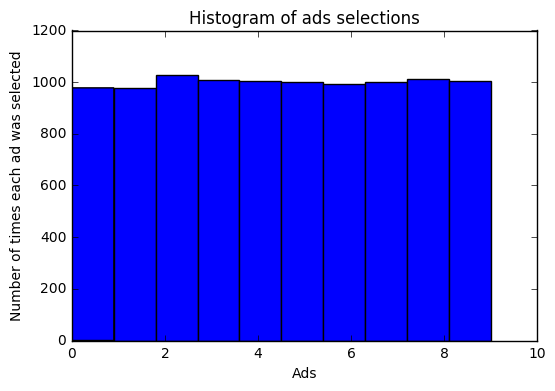

In [3]:
# Visualising the Random Approach
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

*** This histogram shows the uniform distribution of ad selection. This says all the ads are almost equally likely to get maximum CTR. So we can not observe any optimization here. ***

In [4]:
l =  [(i, ads_selected.count(i)) for i in set(ads_selected)]
ind, val=  max(l, key=itemgetter(1))
ctr_random = val / len(ads_selected) *100
print('------ Random Selection ------')
print('Total Reward: ', total_reward)
print('Best ad to select: %d th'%(ind+1)) # ind + 1 as the index in python statrts with 0
print('Click Thru Rate with best ad: %.2f%%'%ctr_random)

------ Random Selection ------
Total Reward:  1250
Best ad to select: 3 th
Click Thru Rate with best ad: 10.29%


## Upper Confidence Bound(UCB)

$\textbf{Step 1} $. For each observation n, we consider two numbers for each ad i:
* $N_i(n) $ - the number of times the ad i was selected upto observation n,
* $R_i(n)$ - the sum of rewards of the ad i upto observation n.

$\textbf{Step 2} $. From these two numbers we compute:
* the average reward of ad i upto observation n

<center> $r_i(n) = \frac{R_i(n)}{N_i(n)} $ </center>

* the confidence interval $ [r_i(n) - \Delta_i(n), r_i(n) + \Delta_i(n)]$ at observation n with

<center> $  \Delta_i(n) = \sqrt{\frac{3}{2}\frac{log(n)}{N_i(n)}} $ </center>

$\textbf{Step 3} $. We select the ad i that has maximum UCB. i.e $r_i(n) + \Delta_i(n) $


In [5]:
numbers_of_selections = [0]*d 
# Number of times that the particular ad is selected upto current state
# Iniliatizing all the ads to 0 since all of them has 0 selection at the start
# We will update this at every itiration based on which ad is selected each time
sums_of_rewards = [0]*d
# sum of reward of particular ad upto current state
# Iniliatizing all the ads to 0 since obvioulsy the sum of reward for all of the ads is 0 at the start.
ads_selected = [] # placeholder for the ad that is selected at each round of observation
total_reward = 0

for n in range(N): # looping over all the observation
    max_ucb = 0
    ad = 0
    for i in range(d): # looping over all version of ads
        # since we do not have any prior information until each of the 10 ads are selected at least once, we will 
        # select the 10 first ad without using ucb strategy. i.e ad 1 at round 1, ad 2 at round 2 and so on upto round 10 
        if numbers_of_selections[i] > 0: # checking if the particular ad is selected before or not
            average_reward = sums_of_rewards[i] / numbers_of_selections[i] # i-th element of vector 
            delta_i = sqrt(3/2 * log(n+1)/ numbers_of_selections[i])
            ucb = average_reward + delta_i
        else: # if not, assigining ucb a large value such that the value is always greater than any possible calculated ucb
            ucb = 10**50
        
        # if the ucb calculated in current iteration is greater than the maximum ucb so far, the new maximum ucb will be
        # the newly calulated ucb. Also, we always select the ad that has maximum UCB. Therefore each time we find new max_ucb,
        # we need to keep track of the specific ad that has maximum upper confidence bound
        if (ucb > max_ucb):
            max_ucb = ucb
            ad = i
    ads_selected.append(ad) # vector of ads that is selected at each round upto current state    
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1 
    # rewarding the currently selected ad by 1
    # updting the ad index
    reward = data.values[n, ad] # reward at apecific round n. 
    # In real time this a response of the user(whether user clicks the ad or not) when a specific ad 
    # is presented in his/her social media account
    # but for simulation dataset we are considering, we want to pick the reward at specific round
    # here 'ad' is nothing but the index of the ad that is selected in the current round
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

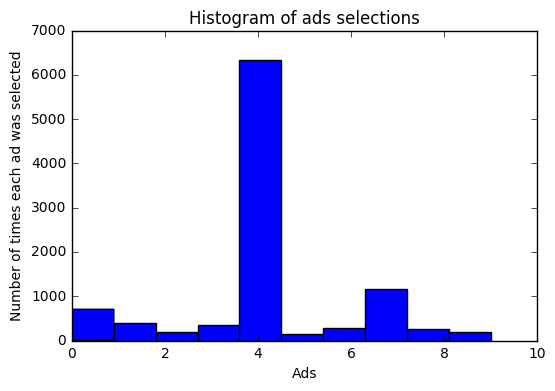

In [6]:
# Visualising UCB result
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

*** Unlike in random selection method, here we can see that Ad-version 5(index = 4) will get maximum CTR. Hence, we can select this ad for the marketing purpose. ***

In [7]:
l =  [(i, ads_selected.count(i)) for i in set(ads_selected)]
l

[(0, 705),
 (1, 387),
 (2, 186),
 (3, 345),
 (4, 6323),
 (5, 150),
 (6, 292),
 (7, 1170),
 (8, 256),
 (9, 186)]

In [8]:
ind, val=  max(l, key=itemgetter(1))
ctr_ucb = val / len(ads_selected) *100
print('------ Upper Confidence Bound ------')
print('Total Reward: ', total_reward)
print('Best ad to select: %d th'%(ind+1)) # ind + 1 as the index in python statrts with 0
print('Click Thru Rate with best ad: %.2f%%'%ctr_ucb)

------ Upper Confidence Bound ------
Total Reward:  2178
Best ad to select: 5 th
Click Thru Rate with best ad: 63.23%


*** Now lets see if we can gain higher total rewards with Thompson Sampling. ***

## Thopson Sampling

$\textbf{Step 1} $. For each observation n, we consider two numbers for each ad i:
* $N_i^1(n) $ - the number of times the ad i got reward 1 upto observation n,
* $N_i^0(n) $ - the number of times the ad i got reward 0 upto observation n.

$\textbf{Step 2} $. For each ad i, we take a random draw from the distribution below:

<center> $ \theta_i(n) = \beta(N_i^1(n)+ 1,  N_i^0(n) + 1) $ </center>

$\textbf{Step 3} $. We select the ad i that has highest $\theta_i(n) $


In [9]:
ads_selected = []
numbers_of_rewards_1 =  [0]*d
# each element in the array represents a number that a specific ad has got reward = 1 so far in the iteration
# Iniliatizing all the values to 0 since no of them are rewarded 1 yet
# We will update this at every itiration based on the ad is rewarded 1 or not
numbers_of_rewards_0 = [0]*d
# each element in the array represents a number that a specific ad has got reward = 0 so far in the iteration
# Iniliatizing all the values to 0 since no of them are rewarded 0 yet
# We will update this at every itiration based on the ad is rewarded 0 or not
total_reward = 0
for n in range(N):    
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        # if the random_beta calculated in current iteration is greater than the max_random so far, the new max_random will be
        # the newly calulated random_beta. Also, we always select 
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad) # vector of ads that is selected at each round upto current state  
    reward = data.values[n, ad]
    # reward at apecific round n. 
    # In real time this a response of the user(whether user clicks the ad or not) when a specific ad 
    # is presented in his/her social media account
    # but for simulation dataset we are considering, we want to pick the reward at specific round
    # here 'ad' is nothing but the index of the ad that is selected in the current round
    # if the reward selected(user response in real time) is 1, the we want to increment the 
    # numbers_of_rewards_1 for the selected ad. And the same goes with numbers_of_rewards_0
    if reward == 1:
        numbers_of_rewards_1[ad] += 1        
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

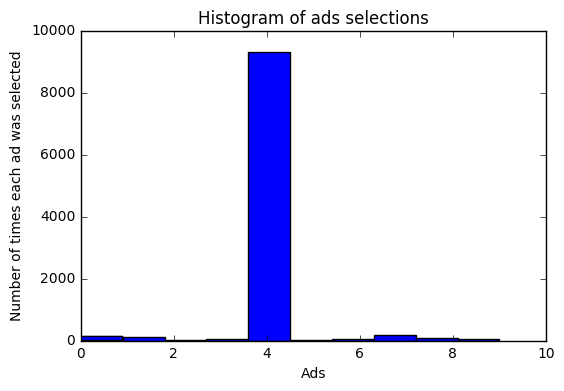

In [10]:
# Visualising Thopson Sampling result
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [11]:
l =  [(i, ads_selected.count(i)) for i in set(ads_selected)]
ind, val=  max(l, key=itemgetter(1))
ctr_ts = val / len(ads_selected) *100
print('------ Thompson Sampling ------')
print('Total Reward: ', total_reward)
print('Best ad to select: %d th'%(ind+1)) # ind + 1 as the index in python statrts with 0
print('Click Thru Rate with best ad: %.2f%%'%ctr_ts)

------ Thompson Sampling ------
Total Reward:  2594
Best ad to select: 5 th
Click Thru Rate with best ad: 93.04%
